<h1> SMS SPAM CLASSIFIER</h1>





**<h2>1.Business Problem</h2>**

**<h3>1.1 Description<h3>**

 Email/SMS is the worldwide use of communication application. It is because of the ease of
use and faster than other communication application. However, its inability to detect
whether the message content is either spam or ham degrade its performance. Nowadays,
lot of cases have been reported regarding stealing of personal information or phishing
activities via message from the user
 
 Nowadays,  a  big  part  of  people  rely  on  available email  or  messages  sent  by  the  stranger.  The  possibility  that anybody  can  leave  an  email  or  message  provides  a  golden opportunity  for  spammers  to  write  spam  message  about  our different interests. Spam fills  inbox with number  of ridiculous emails/messages. Degrades  our  internet speed  to  a great  extent. Steals useful  information  like  our  details  on  our  contact  list. Identifying these spammers and also the spam content can be a hot  topic  of  research  and  laborious  tasks.  Email/SMS  spam  is  an operation to send messages in bulk by mail/SMS.

 The dangers of spam messages for the users are many: undesired advertisement, exposure of private information, becoming a victim of a fraud or financial scheme, being lured into malware and phishing websites, involuntary exposition to inappropriate content, etc. For the network operator, spam messages result in an increased cost in operations.

 A few common spam emails/SMS include fake advertisements, chain emails, and impersonation attempts. While these built-in spam detectors are usually pretty effective, sometimes, a particularly well-disguised spam email/SMS may fall through the cracks, landing in your inbox instead of your spam folder. Clicking on a spam/SMS email can be dangerous, exposing your computer and personal information to different types of malware. Therefore, it’s important to implement additional safety measures to protect your device, especially when it handles sensitive information like user data.

Our main goal of this case study is to design an email/SMS spam filtering system using machine learning. It is a binary classification problem. Given a new email/SMS we will predict whether it is spam or non-spam. The reason to do this is simple: by detecting unsolicited and unwanted emails/SMS, we can prevent spam messages from creeping into the user’s inbox, thereby improving user experience.

**Problem Statement**

* Build a email/SMS spam detector system using machine learning algorithm
* Predict whether the given message is ham or spam.
* Classify the email/SMS into a ham or spam given the email/SMS text.



**<h3>1.2 Source / Useful Links<h3>**

Source :

https://www.kaggle.com/datasets/ganiyuolalekan/spam-assassin-email-classification-dataset

Useful links and References : 

Email based spam detection Journal : https://www.researchgate.net/publication/342113653_Email_based_Spam_Detection


Spam detection using machine learning based binary classifier report : https://myfik.unisza.edu.my/www/fyp/fyp18sem2/report/43660.pdf

Kaggle Notebook of spam and ham classifer : https://www.kaggle.com/code/rumbleftw/beginner-friendly-spam-ham-sms-classification

Text preprocessing for spam classifer : https://www.naukri.com/learning/articles/text-pre-processing-for-spam-filtering/

Feature Engineering on text data : 

https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d

https://www.analyticsvidhya.com/blog/2021/04/a-guide-to-feature-engineering-in-nlp/

https://betterprogramming.pub/beginners-to-advanced-feature-engineering-from-text-data-c228047a4813

https://www.pluralsight.com/guides/building-features-from-text-data

Data Preprocesing :      

https://dev.to/saxenamansi/classifying-spam-emails-using-basic-python-

https://www.analyticsvidhya.com/blog/2021/06/must-known-techniques-for-text-preprocessing-in-nlp/

https://github.com/idevshoaib/Classification-with-Naive-Bayes/blob/master/Naive%20Bayes%20Classification.ipynb


 Blog SMS spam classifier : https://medium.com/analytics-vidhya/sms-spam-classifier-natural-language-processing-1751e2b324ed



**<h3>1.3 Real World /Business objective and Constraints</h3>**

1. The Cost of mis-classification can be very high.
2. Probability of prediction can be useful.
3. No Strict Latency requirement.
4. Interpretability is not much important

**<h2> 2.Machine Learning Problem </h2>**

**<h3>2.1 Data</h3>**


**2.1.1 Data Overview**

* Refer : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

* We have one data file "spam.csv".

* Size of csv file - 503.66 KB 
* The csv file composes of Four columns:

   1.The "v1" column: which contains the labels (ham & spam)

   2.The "v2" column: which contains actual raw text of email/SMS
   

**2.1.2 Examples of a Data points**


text
______________________________________________________________________________
"Thanks a lot for your wishes on my birthday. Thanks you for making my birthday truly memorable."

target
_______________________________________________________________________
0

text
________________________________________________________________________________
"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

target
_______________________________________________________________________________
1

**<h3>2.2 Mapping the real-world problem to an ML problem</h3>**

**2.2.1 Type of Machine Learning Problem**

This is supervised Machine learning Binary Class Classification Problem, for a given email/SMS we have to predict if it is a spam or not.

**2.2.2 Perfomance Metric**

Metric(s):

* Accuracy
* Precision and Recall
* F1-Score
* Binary Confusion Matrix

**2.2.3 Machine Learning Objective and Constraints**

Objective : Predict whether the email is spam or not and also predict its class probability.

Constraints:
* No Strict latency Requirement.
* Reduce False Positive.
* Class Probability are needed. 

**<h2> 3. Exploratory Data Analysis </h2>**

In [ ]:
# importing useful libraries and downloading required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
%matplotlib inline
from wordcloud import WordCloud
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Reading Dataset
data = pd.read_csv("/content/spam.csv", encoding = "ISO-8859-1", engine = "python")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Number of rows and columns in the dataset
data.shape

(5572, 5)

Observation :

* There are total 5572 rows and 5 columns

In [ ]:
# Column Names
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# info of a dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Observation : 
* we have total 5 columns in which Unnamed: 2, Unnamed: 3 and Unnamed: 4 are useless columns because most fo thier rows are empty so we will drop these columns.

In [ ]:
# Dropping Unwanted Columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
# Renaming Columns
data.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Checking for null values
data.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# Checking for the duplicated values
print(data.duplicated().sum())

403


Observation :
*  There are total 403 rows that are duplicated.

In [ ]:
# Removing duplicates rows from the dataset
data = data.drop_duplicates(keep='first')

In [ ]:
# Rechecking any duplicate rows after removing duplicates from the dataset
data.duplicated().sum()

0

In [ ]:
# Shape of the dataset after removing dupliactes rows
data.shape

(5169, 2)

Observation :
* After removing duplicate rows from dataset we are left with 5169 rows and 2 columns.

In [ ]:
# Statistics of Dataset
data.describe()

,target,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
# converting target variable into a Binary type( 0 and 1)
# converting spam --> 1 and Ham --> 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target']=encoder.fit_transform(data['target'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Number of spam and ham emails
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

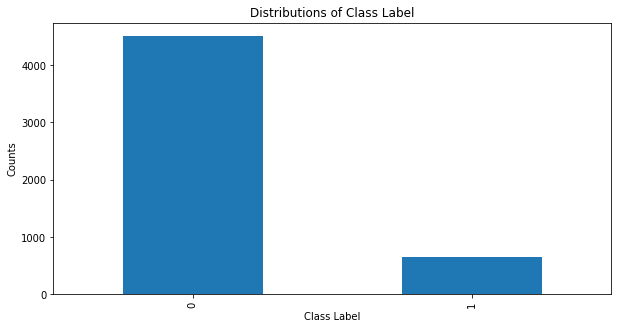

In [ ]:
# Bar plot of spam and ham messages
fig = plt.figure(figsize = (10, 5))
data['target'].value_counts().plot.bar()
plt.xlabel("Class Label")
plt.ylabel("Counts")
plt.title("Distributions of Class Label")
plt.show()

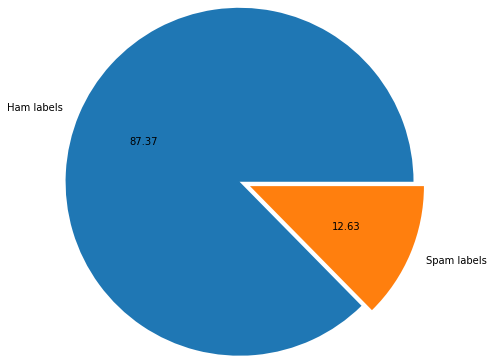

In [ ]:
# Pie Chart for class distribution
explode = (0,0.13) 
plt.pie(data['target'].value_counts(), labels=['Ham labels','Spam labels'],autopct="%0.2f",radius = 2, explode = explode)
plt.show()

Observations : 

* This dataset is an imbalanced dataset because we have significantly higher number of Ham class than spam class.

* We have 4516 ham messages and 653 spam messages

In [ ]:
print(len(data.text[data['target'] == 0])/len(data['text']) * 100,'percent of Ham mails')
print(len(data.text[data['target'] == 1])/len(data['text']) * 100,'percent of Spam mails')

87.3669955503966 percent of Ham mails
12.633004449603405 percent of Spam mails


Adding a Feature : Length

In [ ]:
# Adding a new column to the dataset length (character length)
data['length'] = data['text'].apply(len)
data.head(3)

,target,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [ ]:
# statistics of the length column
data.length.describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: length, dtype: float64

Observation : 

* The average length of the SMS is 79 and minimum length is 2.

* The median length of the SMS is 60.

* There is a sms whose length is 910.



In [ ]:
# lets get some more insights about percentile of length column
# Printing Percentiles
print("90th percentile of the length feature : " ,data.length.quantile(0.9)) # 90th percentile
print("95th percentile of the length feature : " ,data.length.quantile(0.95))
print("98th percentile of the length feature : " ,data.length.quantile(0.98))
print("99th percentile of the length feature : " ,data.length.quantile(0.99))
print("99.1th percentile of the length feature : " ,data.length.quantile(0.991))
print("99.2th percentile of the length feature : " ,data.length.quantile(0.992))
print("99.3th percentile of the length feature : " ,data.length.quantile(0.993))
print("99.4th percentile of the length feature : " ,data.length.quantile(0.994))
print("99.5th percentile of the length feature : " ,data.length.quantile(0.995))
print("99.7th percentile of the length feature : " ,data.length.quantile(0.997))
print("99.9th percentile of the length feature : " ,data.length.quantile(0.999))
# Reference : https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column

90th percentile of the length feature :  155.0
95th percentile of the length feature :  160.59999999999945
98th percentile of the length feature :  197.64000000000033
99th percentile of the length feature :  264.91999999999825
99.1th percentile of the length feature :  276.0
99.2th percentile of the length feature :  281.0
99.3th percentile of the length feature :  290.8239999999996
99.4th percentile of the length feature :  298.9920000000002
99.5th percentile of the length feature :  322.7999999999993
99.7th percentile of the length feature :  377.97600000000057
99.9th percentile of the length feature :  478.47200000000703


Observation :

* From percentiles values we can clearly see that  90% of the SMS has length less than 155 and 99.9 percent of the text has length less than 478. Only few messages has length greater than 478.

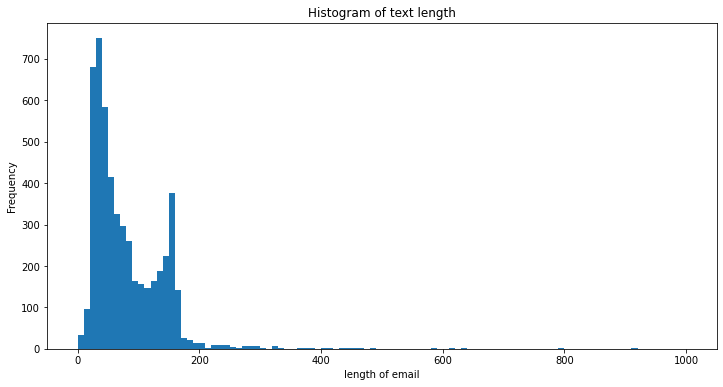

In [ ]:
# plotting histogram of length column
fig = plt.figure(figsize = (12, 6))
plt.xlabel('length of email')
plt.title("Histogram of text length")
data['length'].plot(bins=100,kind='hist',range= (0,1000))

Observations : From histogram we can clearly see that most of messages has length less than 200. There are only few SMS in the dataset that has length greater than 400.

In [ ]:
# Statistics of Ham messages length
print("Spam Message length Statistics")
print("*"*30)
data[data['target']==1]['length'].describe()

Spam Message length Statistics
******************************


count    653.000000
mean     137.891271
std       30.137753
min       13.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      224.000000
Name: length, dtype: float64

In [ ]:
# Statistics of Spam Message length
print("Ham Message length Statistics")
print("*"*30)
data[data['target']==0]['length'].describe()

Ham Message length Statistics
******************************


count    4516.000000
mean       70.459256
std        56.358207
min         2.000000
25%        34.000000
50%        52.000000
75%        90.000000
max       910.000000
Name: length, dtype: float64

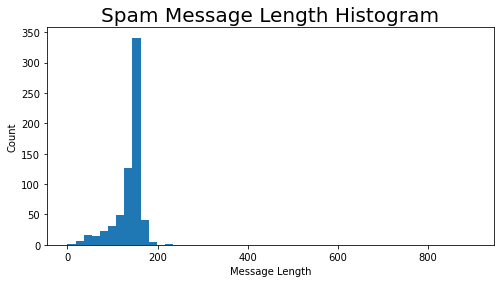

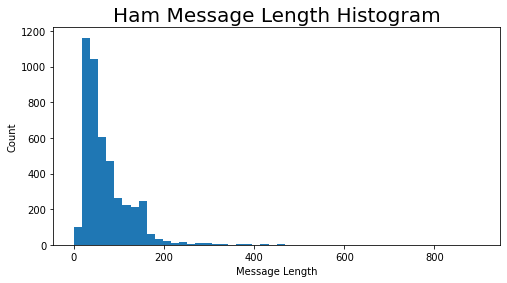

In [ ]:
# Plotting the histogram of length columns for both Spam and Ham messages

fig = plt.figure(figsize = (8, 4))
# Plotting length of SMS for spam sms
data[data['target']==1]['length'].plot(bins=50,kind='hist',range=(0,900))
plt.title('Spam Message Length Histogram',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

# Plotting length of SMS for spam sms
fig = plt.figure(figsize = (8, 4))
data[data['target']==0]['length'].plot(bins=50,kind='hist',range=(0,900))
plt.title('Ham Message Length Histogram',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Message Length')

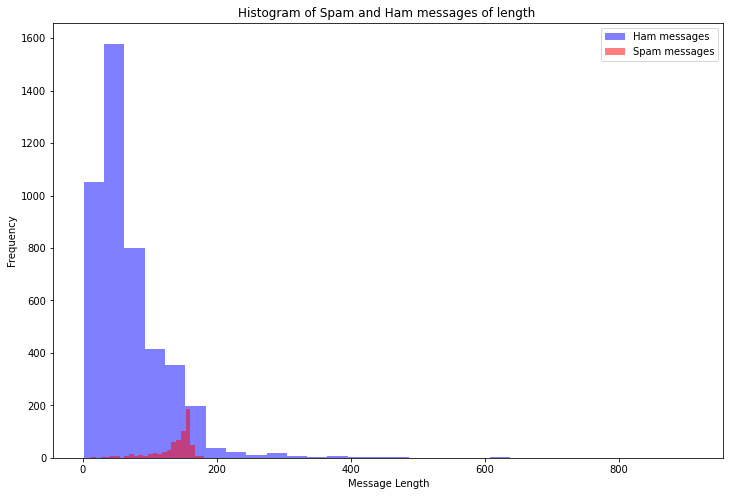

In [ ]:
# Distribution of length for both ham and spam messages
plt.figure(figsize=(12, 8))
data[data['target']==0]['length'].plot(bins=30, kind='hist', color='blue', label='Ham messages', alpha=0.5)
data[data['target']==1]['length'].plot(bins=30,kind='hist', color='red', label='Spam messages', alpha=0.5)
plt.title("Histogram of Spam and Ham messages of length ")
plt.legend()
plt.xlabel("Message Length")

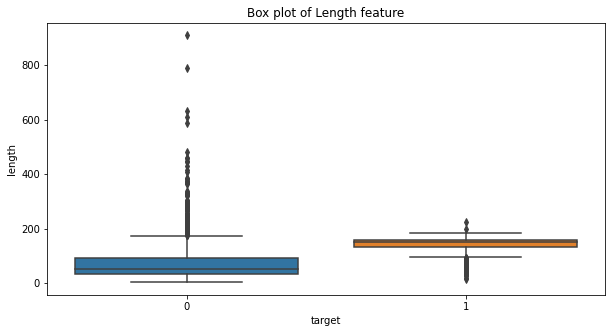

In [ ]:
# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='target',y='length', data=data)
plt.title("Box plot of Length feature")
plt.show()

Observations : 

* From ham and spam statistics we can see that the median length of ham messages is 149 and for ham messages it is 52.

* From Box plot and histogram we can see that most of the ham messages has length less than 100 and most of the spam messages has length greater than 100.

* From above plots and statistics we observed that the spam messages tends to have quite higher length than ham messages. So Length could be a good feature in determining the class label.


Adding a feature: Number of words

In [ ]:
# Adding a new column word count
data['word_count'] = data['text'].apply((lambda x:len(nltk.word_tokenize(x))))
data.head()

,target,text,length,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# statistics of a word count feature
data['word_count'].describe()

count    5169.000000
mean       18.453279
std        13.324793
min         1.000000
25%         9.000000
50%        15.000000
75%        26.000000
max       220.000000
Name: word_count, dtype: float64

Observation :      

*  The median word count in the messages is 15.
* There are are messages which has only one word and there are also some messages which has  220 words.

In [ ]:
# lets get some more insights about percentile of word count column
# Printing Percentiles
print("90th percentile of the word_count feature : " ,data.word_count.quantile(0.9)) # 90th percentile
print("95th percentile of the word_count feature : " ,data.word_count.quantile(0.95))
print("98th percentile of the word_count feature : " ,data.word_count.quantile(0.98))
print("99th percentile of the word_count feature : " ,data.word_count.quantile(0.99))
print("99.1th percentile of the word_count feature : " ,data.word_count.quantile(0.991))
print("99.2th percentile of the word_count feature : " ,data.word_count.quantile(0.992))
print("99.3th percentile of the word_count feature : " ,data.word_count.quantile(0.993))
print("99.4th percentile of the word_count feature : " ,data.word_count.quantile(0.994))
print("99.5th percentile of the word_count feature : " ,data.word_count.quantile(0.995))
print("99.7th percentile of the word_count feature : " ,data.word_count.quantile(0.997))
print("99.9th percentile of the word_count feature : " ,data.word_count.quantile(0.999))
# Reference : https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column

90th percentile of the word_count feature :  34.0
95th percentile of the word_count feature :  39.0
98th percentile of the word_count feature :  46.0
99th percentile of the word_count feature :  61.0
99.1th percentile of the word_count feature :  67.0
99.2th percentile of the word_count feature :  68.0
99.3th percentile of the word_count feature :  70.0
99.4th percentile of the word_count feature :  75.0
99.5th percentile of the word_count feature :  79.0
99.7th percentile of the word_count feature :  89.4960000000001
99.9th percentile of the word_count feature :  117.496000000001


Observations :  

*  90 percent of the messages has less than 34 words.

* 99.9% of the messages that has length that has word count less than 117.


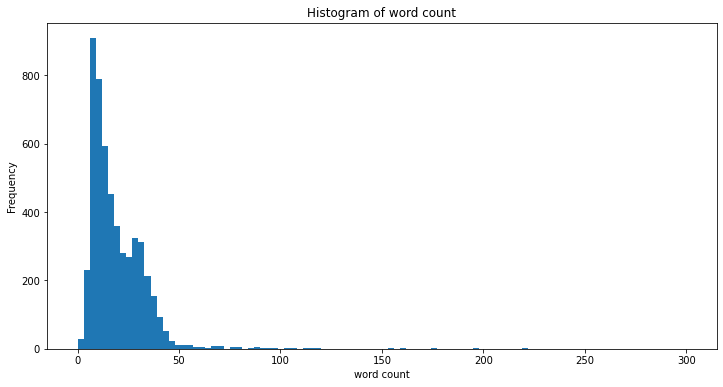

In [ ]:
# plotting histogram of word count column
fig = plt.figure(figsize = (12, 6))
plt.xlabel('word count')
plt.title("Histogram of word count")
data['word_count'].plot(bins=100,kind='hist',range= (0,300))

Observation :

* From histogram the feature looks left skewed and most of the SMS has word count less than 50 and very few numbers of SMS has word length greater than 50.

In [ ]:
# Statistics of spam messages word count
print("Spam Message word count Statistics")
print("*"*30)
data[data['target']==1]['word_count'].describe()

Spam Message word count Statistics
******************************


count    653.000000
mean      27.667688
std        7.008418
min        2.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       46.000000
Name: word_count, dtype: float64

In [ ]:
# Statistics of Ham messages word count
print("Ham Message word count Statistics")
print("*"*30)
data[data['target']==0]['word_count'].describe()

Ham Message word count Statistics
******************************


count    4516.000000
mean       17.120903
std        13.493725
min         1.000000
25%         8.000000
50%        13.000000
75%        22.000000
max       220.000000
Name: word_count, dtype: float64

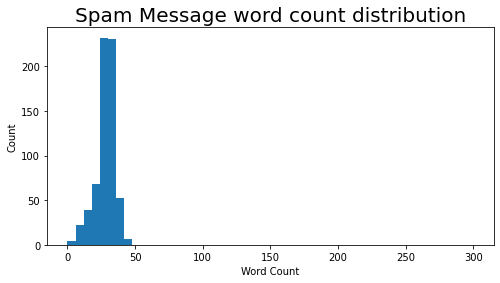

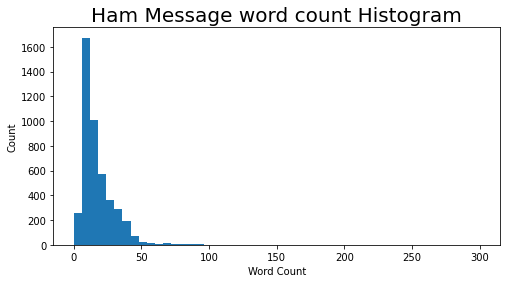

In [ ]:
# Plotting the histogram of "word_count" feature for both Spam and Ham messages

# Plotting word count for spam messages
fig = plt.figure(figsize = (8, 4))
data[data['target']==1]['word_count'].plot(bins=50,kind='hist',range=(0,300))
plt.title('Spam Message word count distribution',fontsize=20)
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

# Plotting word count for ham messages
fig = plt.figure(figsize = (8, 4))
data[data['target']==0]['word_count'].plot(bins=50,kind='hist',range=(0,300))
plt.title('Ham Message word count Histogram',fontsize=20)
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'word count')

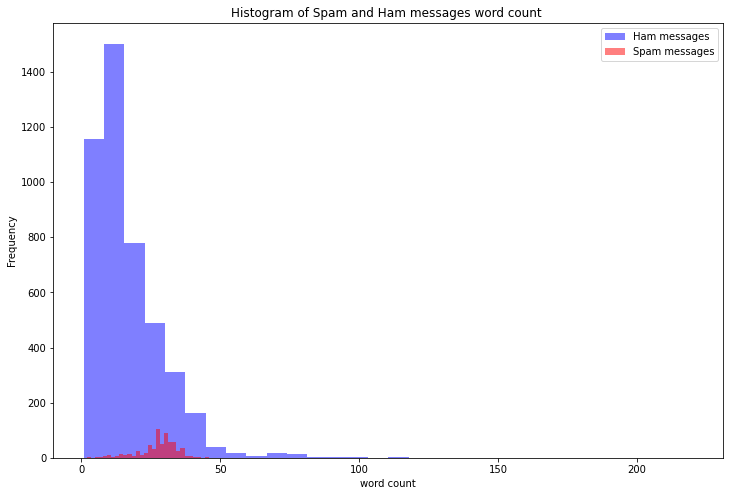

In [ ]:
# Histogram of Spam and Ham messages word count
plt.figure(figsize=(12, 8))
data[data['target']==0]['word_count'].plot(bins=30, kind='hist', color='blue', label='Ham messages', alpha=0.5)
data[data['target']==1]['word_count'].plot(bins =30 ,kind='hist', color='red', label='Spam messages', alpha=0.5)
plt.title("Histogram of Spam and Ham messages word count ")
plt.legend()
plt.xlabel("word count")

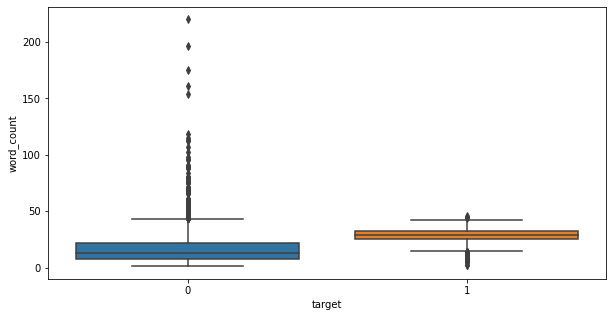

In [ ]:
# Box plot of feature word count
plt.figure(figsize=(10, 5))
sns.boxplot(x='target',y='word_count', data=data)
plt.show()

Observation : 

*  From ham and spam statistics we can observe that median word count in spam messages is 29 and for ham messages it is 13.

* From Box plot we observed that most of the ham messages has word count in range of 0 - 25 and for spam messages it is in between 25-30.

* From above histograms observed we that spam messages contains more words comnpared to ham messages. So word count could also be a useful feature in determining the class label but it is not good as length feature.



Adding a new feature : sentence_length

In [ ]:
# Adding a new column sentence length
data['sentence_count'] = data['text'].apply((lambda x:len(nltk.sent_tokenize(x))))
data.head()

,target,text,length,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# statitics of feature sentence count
data['sentence_count'].describe()

count    5169.000000
mean        1.947185
std         1.362406
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        28.000000
Name: sentence_count, dtype: float64

Observations :      

* On a median there is only one sentence in a messages.
* There are also some messages that has 28 sentences.

In [ ]:
# lets get some more insights about percentile of sentence_count feature
# Printing Percentiles
print("80th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.8)) # 90th percentile
print("90th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.9))
print("95th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.95))
print("99th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.99))
print("99.1th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.991))
print("99.2th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.992))
print("99.3th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.993))
print("99.4th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.994))
print("99.5th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.995))
print("99.7th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.997))
print("99.9th percentile of the sentence_count feature : " ,data.sentence_count.quantile(0.999))
# Reference : https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column

80th percentile of the sentence_count feature :  3.0
90th percentile of the sentence_count feature :  4.0
95th percentile of the sentence_count feature :  5.0
99th percentile of the sentence_count feature :  6.0
99.1th percentile of the sentence_count feature :  7.0
99.2th percentile of the sentence_count feature :  7.0
99.3th percentile of the sentence_count feature :  7.0
99.4th percentile of the sentence_count feature :  7.0
99.5th percentile of the sentence_count feature :  7.0
99.7th percentile of the sentence_count feature :  8.0
99.9th percentile of the sentence_count feature :  11.0


Observations :

* 80 % of the messages has less than 3 sentences and 99% of the SMS has less than 6 sentences.

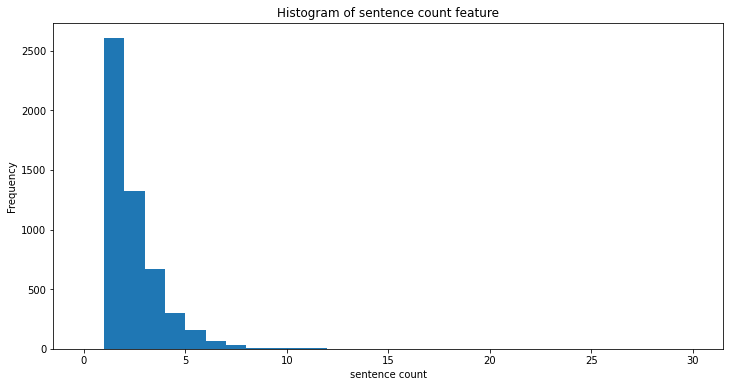

In [ ]:
# plotting histogram of sentence count feature
fig = plt.figure(figsize = (12, 6))
plt.xlabel('sentence count')
plt.title("Histogram of sentence count feature")
data['sentence_count'].plot(bins=30,kind='hist',range= (0,30))

Observation : 

* From this histogram we can see that most of the messages has less than 5 Sentences.

In [ ]:
# Statistics of Spam messages "sentence_count"
print("Spam Message sentence_count Statistics")
print("*"*30)
data[data['target']==1]['sentence_count'].describe()

Spam Message sentence_count Statistics
******************************


count    653.000000
mean       2.967841
std        1.483201
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: sentence_count, dtype: float64

In [ ]:
# Statistics of Ham messages "sentence_count"
print("Ham Message sentence_count Statistics")
print("*"*30)
data[data['target']==0]['sentence_count'].describe()

Ham Message sentence_count Statistics
******************************


count    4516.000000
mean        1.799601
std         1.278465
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        28.000000
Name: sentence_count, dtype: float64

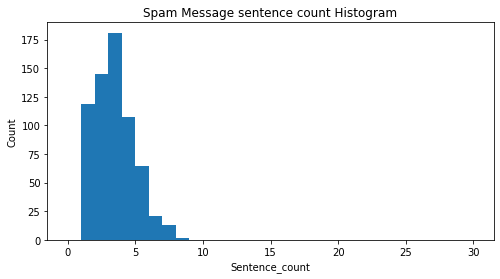

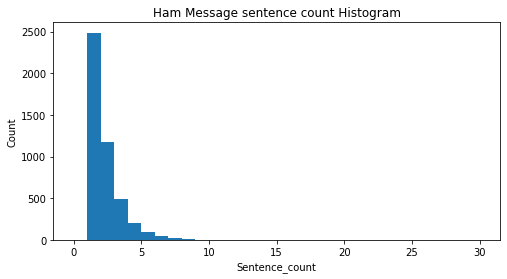

In [ ]:
# Plotting the histogram of sentence_count feature for both Spam and Ham messages

# Plotting length of SMS for spam sms
fig = plt.figure(figsize = (8, 4))
data[data['target']==1]['sentence_count'].plot(bins=30,kind='hist',range=(0,30))
plt.title('Spam Message sentence count Histogram')
plt.xlabel('Sentence_count')
plt.ylabel('Count')
plt.show()

# Plotting length of SMS for ham sms
fig = plt.figure(figsize = (8, 4))
data[data['target']==0]['sentence_count'].plot(bins=30,kind='hist',range=(0,30))
plt.title('Ham Message sentence count Histogram')
plt.xlabel('Sentence_count')
plt.ylabel('Count')
plt.show()

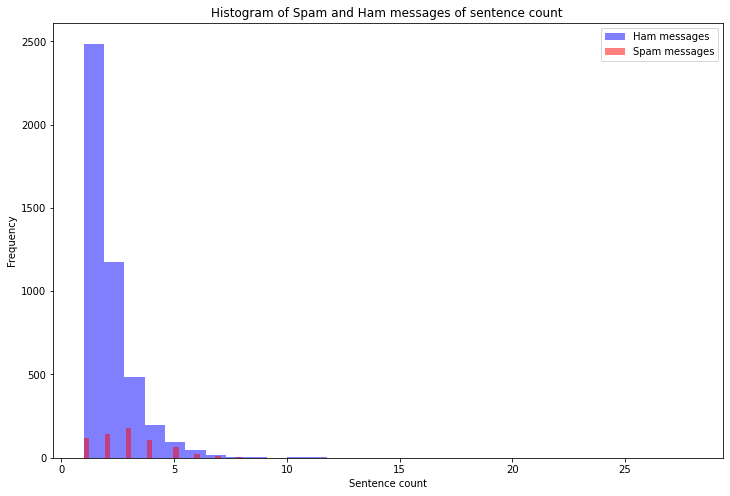

In [ ]:
# Distribution of sentence count feature for both spam and ham message
plt.figure(figsize=(12, 8))
data[data['target']==0]['sentence_count'].plot(bins=30, kind='hist', color='blue', label='Ham messages', alpha=0.5)
data[data['target']==1]['sentence_count'].plot( bins=30,kind='hist', color='red', label='Spam messages', alpha=0.5)
plt.title("Histogram of Spam and Ham messages of sentence count ")

plt.xlabel("Sentence count")
plt.legend()

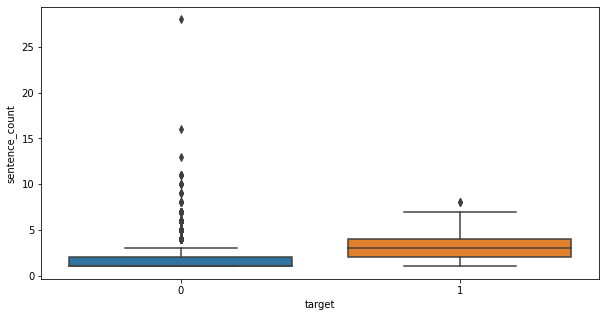

In [ ]:
# Box plot of sentence count feature for both ham and spam messages
plt.figure(figsize=(10, 5))
sns.boxplot(x='target',y='sentence_count', data=data)
plt.show()

Observations :    
* From ham and spam Statistics, The median number of sentence in Ham messages is 1 and for spam messages it is 3.

* From Histogram and Boxplot we observed that typically spam messages has more sentences than ham messages but they are quite overlapping.

* Box plot and histogram is quite overlapped compared to length and word count feature, so Sentence count might not be a good feature in determining the class label.

Adding new feature : digits count

In [ ]:
def digits_count(string):
    '''
    Function to compute number of digits in a given text
    '''
    digit_count = 0
    for i in range(len(string)):
        if(string[i].isalpha()):
            continue
        elif(string[i].isdigit()):
            digit_count += 1 
        elif(string[i] == ' '):
            continue
        else:
            continue
    return digit_count
data['digits_count'] = data['text'].map(digits_count)
data.head()
# Reference : https://stackoverflow.com/questions/24878174/how-to-count-digits-letters-spaces-for-a-string-in-python

,target,text,length,word_count,sentence_count,digits_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,0,Ok lar... Joking wif u oni...,29,8,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,25
3,0,U dun say so early hor... U c already then say...,49,13,1,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0


In [ ]:
# Statistics of digit count feature
data['digits_count'].describe()

count    5169.000000
mean        2.205069
std         6.025241
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        47.000000
Name: digits_count, dtype: float64

Observation : 

* There are on an average 2 digits in a Message. Maximum number of digits in a message is 47.

In [ ]:
# lets get some more insights about percentile of "digit_count" feature
# Printing Percentiles
print("80th percentile of the length feature : " ,data.digits_count.quantile(0.8)) # 90th percentile
print("85th percentile of the length feature : " ,data.digits_count.quantile(0.85))
print("90th percentile of the length feature : " ,data.digits_count.quantile(0.9))
print("99th percentile of the length feature : " ,data.digits_count.quantile(0.99))
print("99.1th percentile of the length feature : " ,data.digits_count.quantile(0.991))
print("99.2th percentile of the length feature : " ,data.digits_count.quantile(0.992))
print("99.3th percentile of the length feature : " ,data.digits_count.quantile(0.993))
print("99.4th percentile of the length feature : " ,data.digits_count.quantile(0.994))
print("99.5th percentile of the length feature : " ,data.digits_count.quantile(0.995))
print("99.7th percentile of the length feature : " ,data.digits_count.quantile(0.997))
print("99.9th percentile of the length feature : " ,data.digits_count.quantile(0.999))
# Reference : https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column

80th percentile of the length feature :  1.0
85th percentile of the length feature :  2.0
90th percentile of the length feature :  8.0
99th percentile of the length feature :  27.31999999999971
99.1th percentile of the length feature :  28.0
99.2th percentile of the length feature :  28.0
99.3th percentile of the length feature :  28.0
99.4th percentile of the length feature :  29.0
99.5th percentile of the length feature :  30.0
99.7th percentile of the length feature :  33.0
99.9th percentile of the length feature :  39.496000000001004


Observation : 80% of the messages has less than 1 digits and 90% of the messages has less than 8 digits.

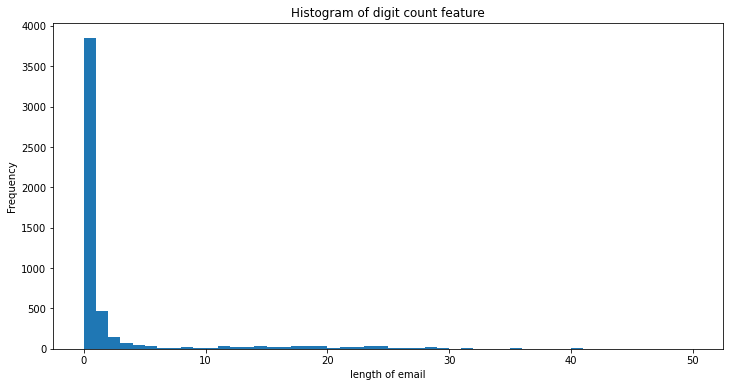

In [ ]:
# plotting histogram of digit count
fig = plt.figure(figsize = (12, 6))
plt.xlabel('length of email')
plt.title("Histogram of digit count feature")
data['digits_count'].plot(bins=50,kind='hist',range= (0,50))

Observation :      

* Most of the messages has less than 10 digits.

In [ ]:
# Statistics of Spam messages digit count feature
print("Spam Message digit count feature Statistics")
print("*"*30)
data[data['target']==1]['digits_count'].describe()

Spam Message digit count feature Statistics
******************************


count    653.000000
mean      15.447167
std        8.924653
min        0.000000
25%        9.000000
50%       16.000000
75%       22.000000
max       47.000000
Name: digits_count, dtype: float64

In [ ]:
# Statistics of Ham messages of digit count feature
print("Ham Message digit count feature Statistics")
print("*"*30)
data[data['target']==0]['digits_count'].describe()

Ham Message digit count feature Statistics
******************************


count    4516.000000
mean        0.290301
std         1.011825
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.000000
Name: digits_count, dtype: float64

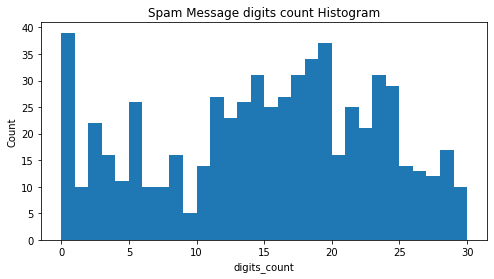

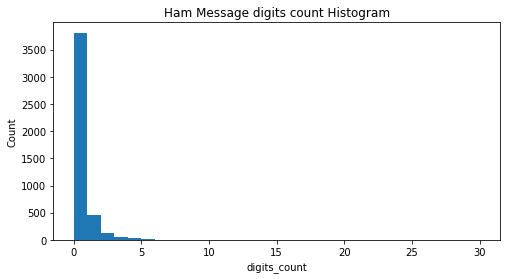

In [ ]:
# Plotting the histogram of digit_count feature for both Spam and Ham messages

# Plotting digit count of SMS for spam messages
fig = plt.figure(figsize = (8, 4))
data[data['target']==1]['digits_count'].plot(bins=30,kind='hist',range=(0,30))
plt.title('Spam Message digits count Histogram')
plt.xlabel('digits_count')
plt.ylabel('Count')
plt.show()

# Plotting digit count of SMS for ham sms
fig = plt.figure(figsize = (8, 4))
data[data['target']==0]['digits_count'].plot(bins=30,kind='hist',range=(0,30))
plt.title('Ham Message digits count Histogram')
plt.xlabel('digits_count')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'digits_count')

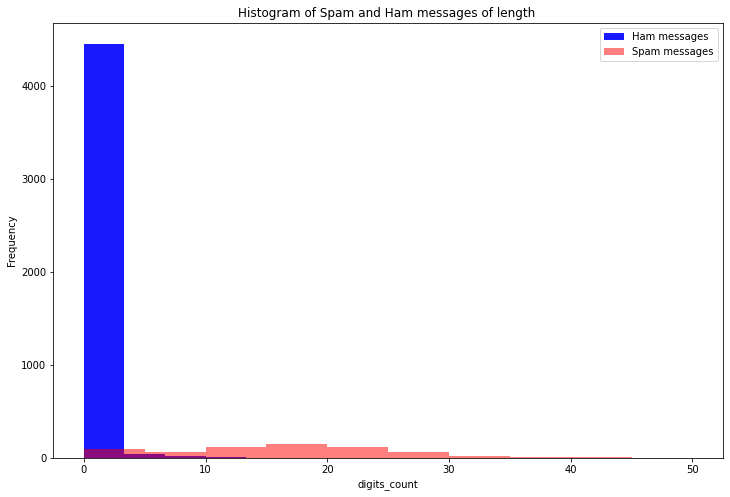

In [ ]:
# Distribution of Both ham and spam message for sentence length feature
plt.figure(figsize=(12, 8))
data[data['target']==0]['digits_count'].plot(bins=15, kind='hist', color='blue', label='Ham messages', alpha=0.9, range= (0,50))
data[data['target']==1]['digits_count'].plot(kind='hist', color='red', label='Spam messages', alpha=0.5 , range= (0,50))
plt.title("Histogram of Spam and Ham messages of length ")
plt.legend()
plt.xlabel("digits_count")

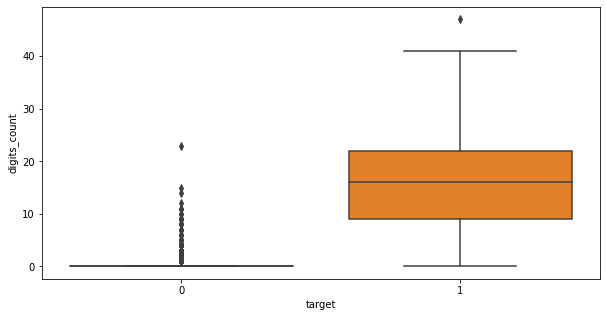

In [ ]:
# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='target',y='digits_count', data=data)
plt.show()

Observation :       

* From Histogram we can observe that most of the ham messages has only one digit and there are very few ham messages that contain greater than one digit. Typically ham messages has less than 5 digits

* From Box plot it is clear that Spam messages has high digit count compared to ham messages because both box plots are very differentiable.

* From Histogram and box plot we observed that most of the spam messages has digits count in range 10 - 20.

* digit count can be a good feature in determining the class label becuase both class box plots are quite far away. This feature could be a best feature among the feetures that we have seen till now.

Adding new feature: Count UpperCase Words

In [ ]:
# Adding new feature number of upper case word
def Number_of_UpperCase_words(text):
  '''
  Function to compute number of upper case words in a text
  '''
  count = 0
  for word in text.split():
      if word.isupper():
        count += 1
  return count



x = "Hello HII HOW are YOU"
print(Number_of_UpperCase_words(x))



data['uppercase_words_count'] = data['text'].apply(Number_of_UpperCase_words)

3


In [ ]:
# statistics of uppercase words count feature
data['uppercase_words_count'].describe()

count    5169.000000
mean        1.041594
std         2.750670
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        37.000000
Name: uppercase_words_count, dtype: float64

Observation :      
* On an average there is only one uppercase words in a message.

* There is a message where it has 128 upper case words.


In [ ]:
# lets get some more insights about percentile of upper case word count column
# Printing Percentiles
print("55th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.55)) # 90th percentile
print("80th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.80))
print("85th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.85))
print("90th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.90))
print("99.1th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.991))
print("99.2th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.992))
print("99.3th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.993))
print("99.4th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.994))
print("99.5th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.995))
print("99.7th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.997))
print("99.9th percentile of the uppercase_words_count feature : " ,data.uppercase_words_count.quantile(0.999))
# Reference : https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column

55th percentile of the uppercase_words_count feature :  0.0
80th percentile of the uppercase_words_count feature :  1.0
85th percentile of the uppercase_words_count feature :  2.0
90th percentile of the uppercase_words_count feature :  3.0
99.1th percentile of the uppercase_words_count feature :  14.488000000000284
99.2th percentile of the uppercase_words_count feature :  17.65599999999995
99.3th percentile of the uppercase_words_count feature :  20.0
99.4th percentile of the uppercase_words_count feature :  21.99200000000019
99.5th percentile of the uppercase_words_count feature :  23.0
99.7th percentile of the uppercase_words_count feature :  25.496000000000095
99.9th percentile of the uppercase_words_count feature :  31.0


Observations : 

*  55% of the messages in the dataset has no capital words.

*  90% of the messages has less than 3 capital words.

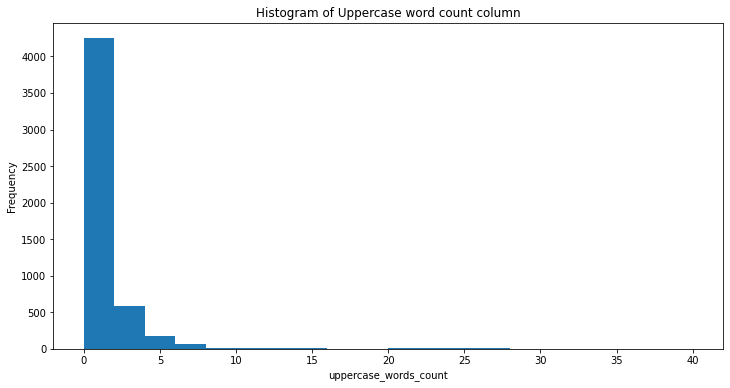

In [ ]:
# plotting histogram of uppercase_words_count column
fig = plt.figure(figsize = (12, 6))
plt.xlabel('uppercase_words_count')
plt.title("Histogram of Uppercase word count column")
data['uppercase_words_count'].plot(bins=20,kind='hist',range= (0,40))

Observation :         

* Most of the messages has capital words counts in range between (0 - 5).

In [ ]:
# Statistics of Spam messages uppercase_words_count feature
print("Spam Message uppercase_words_count feature Statistics")
print("*"*30)
data[data['target']==1]['uppercase_words_count'].describe()

Spam Message uppercase_words_count feature Statistics
******************************


count    653.000000
mean       2.545176
std        2.798969
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       27.000000
Name: uppercase_words_count, dtype: float64

In [ ]:
# Statistics of Ham messages "uppercase_words_count"
print("Ham Message uppercase_words_count feature Statistics")
print("*"*30)
data[data['target']==0]['uppercase_words_count'].describe()

Ham Message uppercase_words_count feature Statistics
******************************


count    4516.000000
mean        0.824181
std         2.674866
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        37.000000
Name: uppercase_words_count, dtype: float64

Text(0.5, 0, 'digits_count')

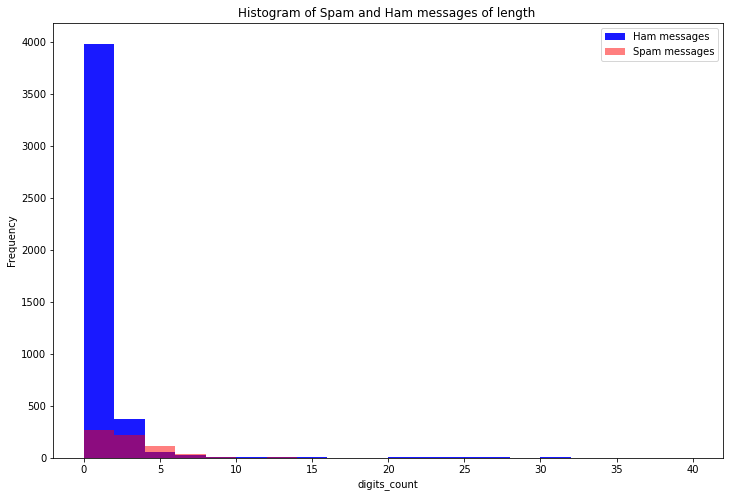

In [ ]:
# Histogram of uppercase_words_count feature for both ham and spam messages
plt.figure(figsize=(12, 8))
data[data['target']==0]['uppercase_words_count'].plot(bins=20, kind='hist', color='blue', label='Ham messages', alpha=0.9, range= (0,40))
data[data['target']==1]['uppercase_words_count'].plot(bins =20,kind='hist', color='red', label='Spam messages', alpha=0.5 , range= (0,40))
plt.title("Histogram of Spam and Ham messages of length ")
plt.legend()
plt.xlabel("digits_count")

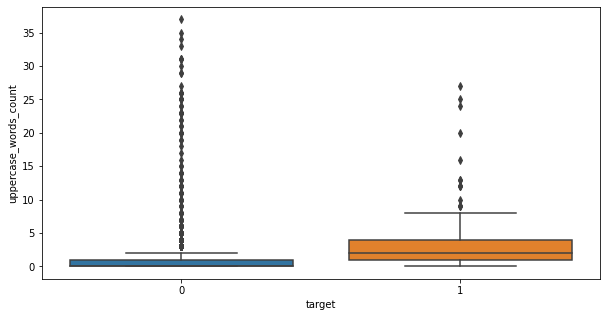

In [ ]:
# Box plot of uppercase word count feature
plt.figure(figsize=(10, 5))
sns.boxplot(x='target',y='uppercase_words_count', data=data)
plt.show()

Observations :         

* From statistics we can observe that almost 50% of the ham messages doesn't have capital word and there are 50% of the ham messages that has 2 capital words.

* From histogram we observed that most of the ham messges has less than 5 uppercase words.

* Box plot is quite spreaded for ham messages but most of the spam messages has lss than 2 uppercase words and for spam messages typically there is less than 5 uppercase words. Box plot and histogram both looks quite overlapped.

* From the above plots and statistics we observed that typically spam messages has more number of capital words but it could not be a good feature in seprative ham and spam messages becuase some of the spam messages has also more than 5 uppercase words.



Adding new feature : Count unique word

In [ ]:
# Count unique words
def count_unique_words(text):
    '''
    Function to compute number of unique word in a messages
    '''
    return len(set(text.split()))
data['unique_words_count'] = data['text'].apply(count_unique_words)

In [ ]:
data['unique_words_count'].describe()

count    5169.000000
mean       14.343974
std         9.253048
min         1.000000
25%         7.000000
50%        12.000000
75%        21.000000
max       107.000000
Name: unique_words_count, dtype: float64

Observation :                

* The median number of unique words in a message is 12.

* There is a message where total number of unique word is 107.

In [ ]:
# lets get some more insights about percentile of unique word count feature
# Printing Percentiles
print("85th percentile of the length feature : " ,data.unique_words_count.quantile(0.85)) # 90th percentile
print("95th percentile of the length feature : " ,data.unique_words_count.quantile(0.95))
print("98th percentile of the length feature : " ,data.unique_words_count.quantile(0.98))
print("99th percentile of the length feature : " ,data.unique_words_count.quantile(0.99))
print("99.1th percentile of the length feature : " ,data.unique_words_count.quantile(0.991))
print("99.2th percentile of the length feature : " ,data.unique_words_count.quantile(0.992))
print("99.3th percentile of the length feature : " ,data.unique_words_count.quantile(0.993))
print("99.4th percentile of the length feature : " ,data.unique_words_count.quantile(0.994))
print("99.5th percentile of the length feature : " ,data.unique_words_count.quantile(0.995))
print("99.7th percentile of the length feature : " ,data.unique_words_count.quantile(0.997))
print("99.9th percentile of the length feature : " ,data.unique_words_count.quantile(0.999))
# Reference : https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column

85th percentile of the length feature :  25.0
95th percentile of the length feature :  29.0
98th percentile of the length feature :  34.0
99th percentile of the length feature :  41.0
99.1th percentile of the length feature :  43.488000000000284
99.2th percentile of the length feature :  46.0
99.3th percentile of the length feature :  47.0
99.4th percentile of the length feature :  49.99200000000019
99.5th percentile of the length feature :  52.0
99.7th percentile of the length feature :  57.496000000000095
99.9th percentile of the length feature :  74.16000000000167


Observation :       
* 99% of the spam messages has less than 40 unique words.

In [ ]:
# Statistics of Spam messages length
print("Spam Message length Statistics")
print("*"*30)
data[data['target']==1]['unique_words_count'].describe()

Spam Message length Statistics
******************************


count    653.000000
mean      22.569678
std        5.514076
min        2.000000
25%       20.000000
50%       24.000000
75%       26.000000
max       33.000000
Name: unique_words_count, dtype: float64

In [ ]:
# Statistics of Ham messages length
print("Ham Message length Statistics")
print("*"*30)
data[data['target']==0]['unique_words_count'].describe()

Ham Message length Statistics
******************************


count    4516.000000
mean       13.154562
std         9.078007
min         1.000000
25%         7.000000
50%        10.000000
75%        17.000000
max       107.000000
Name: unique_words_count, dtype: float64

Observations :         

* The median number of unique words in a ham messages is 10 and for spam messages it is 24

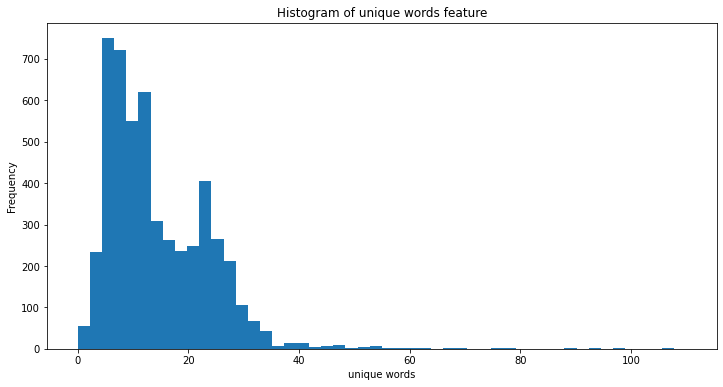

In [ ]:
# plotting histogram of unique_words feature
fig = plt.figure(figsize = (12, 6))
plt.xlabel('unique words')
plt.title("Histogram of unique words feature")
data['unique_words_count'].plot(bins=50,kind='hist',range= (0,110))

Observations :     

* For most of the messages the unique words count lies between 0 to 40. 

Text(0.5, 0, 'unique words count')

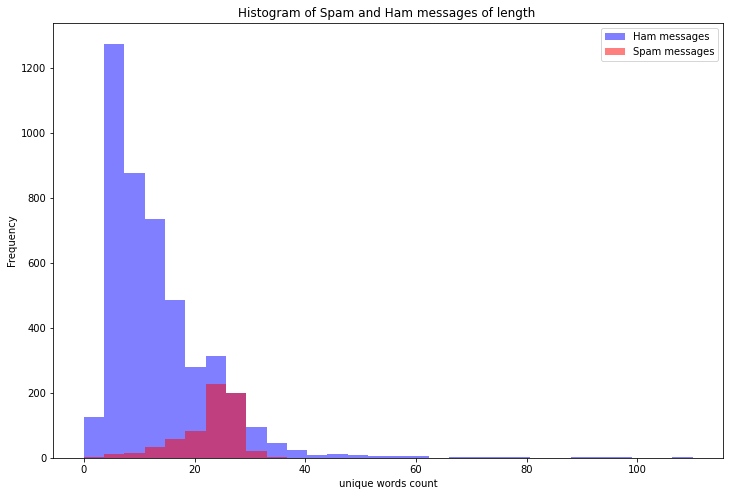

In [ ]:
# plotting histogram of unique word feature for both spam and ham messages
plt.figure(figsize=(12, 8))
data[data['target']==0]['unique_words_count'].plot(bins=30, kind='hist', color='blue', label='Ham messages', alpha=0.5, range= (0,110))
data[data['target']==1]['unique_words_count'].plot(bins =30,kind='hist', color='red', label='Spam messages', alpha=0.5 , range= (0,110))
plt.title("Histogram of Spam and Ham messages of length ")
plt.legend()
plt.xlabel("unique words count")

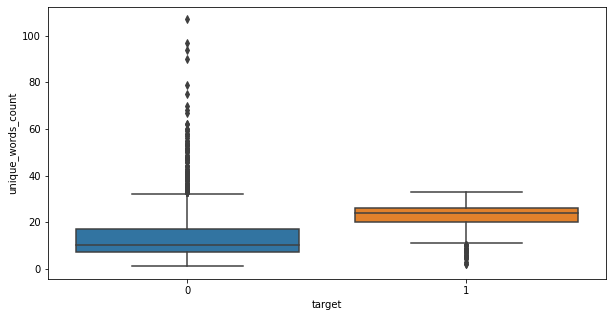

In [ ]:
# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='target',y='unique_words_count', data=data)
plt.show()

Observations :      

* From the Histogram of spam and ham messages we can clearly see that spam messages has more unique words than ham messages.

* Box plot is quite differentiable for both spam and ham messages. Most of the ham messages has less than 20 unique words and most of the ham messages has greater than 20 unique words.

* unique word count will be good feature in seprating class label.

Adding new feature : average number of word length in a message


In [ ]:
# computing average word length feature
data['average_word_length'] = data['length']/data['word_count']

In [ ]:
# Statistic of the feature
data['average_word_length'].describe()

count    5169.000000
mean        4.246508
std         0.994653
min         1.166667
25%         3.750000
50%         4.166667
75%         4.642857
max        49.000000
Name: average_word_length, dtype: float64

Observation : 
* The median number of average word length in a messages is 4.16.

* There are some messages where average word length is 49.

In [ ]:
# lets get some more insights about percentile of average word length feature
# Printing Percentiles
print("90th percentile of the length feature : " ,data.average_word_length.quantile(0.90)) # 90th percentile
print("95th percentile of the length feature : " ,data.average_word_length.quantile(0.95))
print("98th percentile of the length feature : " ,data.average_word_length.quantile(0.98))
print("99th percentile of the length feature : " ,data.average_word_length.quantile(0.99))
print("99.1th percentile of the length feature : " ,data.average_word_length.quantile(0.991))
print("99.2th percentile of the length feature : " ,data.average_word_length.quantile(0.992))
print("99.3th percentile of the length feature : " ,data.average_word_length.quantile(0.993))
print("99.4th percentile of the length feature : " ,data.average_word_length.quantile(0.994))
print("99.5th percentile of the length feature : " ,data.average_word_length.quantile(0.995))
print("99.7th percentile of the length feature : " ,data.average_word_length.quantile(0.997))
print("99.9th percentile of the length feature : " ,data.average_word_length.quantile(0.999))
# Reference : https://stackoverflow.com/questions/39581893/pandas-find-percentile-stats-of-a-given-column

90th percentile of the length feature :  5.2
95th percentile of the length feature :  5.568944099378879
98th percentile of the length feature :  6.078892307692309
99th percentile of the length feature :  6.5
99.1th percentile of the length feature :  6.51060869565218
99.2th percentile of the length feature :  6.555555555555555
99.3th percentile of the length feature :  6.629963636363622
99.4th percentile of the length feature :  6.7272727272727275
99.5th percentile of the length feature :  6.878999999999996
99.7th percentile of the length feature :  7.696727272727279
99.9th percentile of the length feature :  8.5


Observations :
* 90% of the messages has average word length of 6.5

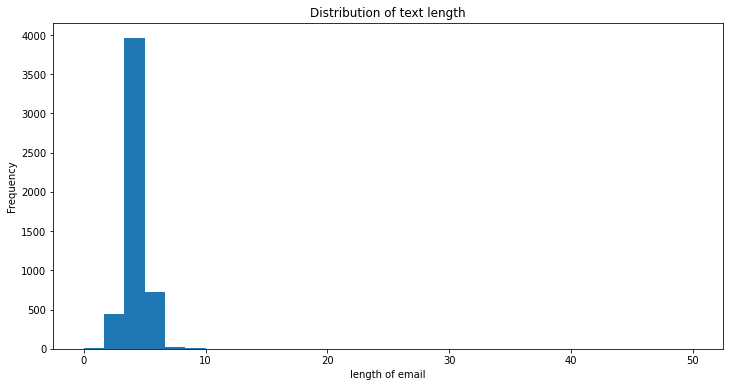

In [ ]:
# plotting histogram of length column
fig = plt.figure(figsize = (12, 6))
plt.xlabel('length of email')
plt.title("Distribution of text length")
data['average_word_length'].plot(bins=30,kind='hist',range= (0,50))

Observation :     

* Most of the messages has average word length count between 0 to 10.

In [ ]:
# Statistics of Spam messagees average word length feature
print("Spam Message length Statistics")
print("*"*30)
data[data['target']==1]['average_word_length'].describe()

Spam Message length Statistics
******************************


count    653.000000
mean       5.077816
std        0.708180
min        3.261905
25%        4.606061
50%        5.000000
75%        5.461538
max       10.062500
Name: average_word_length, dtype: float64

In [ ]:
# Statistics of Spam average word length feature
print("Ham Message length Statistics")
print("*"*30)
data[data['target']==0]['average_word_length'].describe()

Ham Message length Statistics
******************************


count    4516.000000
mean        4.126303
std         0.972417
min         1.166667
25%         3.700000
50%         4.075775
75%         4.485065
max        49.000000
Name: average_word_length, dtype: float64

Text(0.5, 0, 'unique words count')

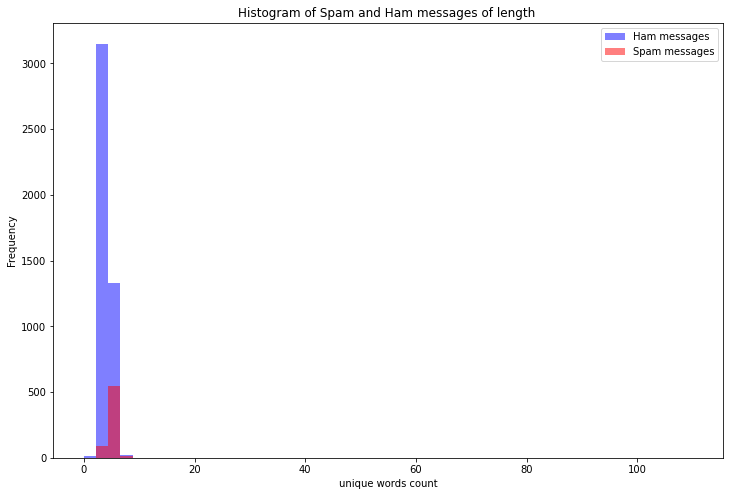

In [ ]:
# plotting histogram of unique word feature for both spam and ham messages
plt.figure(figsize=(12, 8))
data[data['target']==0]['average_word_length'].plot(bins=50, kind='hist', color='blue', label='Ham messages', alpha=0.5, range= (0,110))
data[data['target']==1]['average_word_length'].plot(bins =50,kind='hist', color='red', label='Spam messages', alpha=0.5 , range= (0,110))
plt.title("Histogram of Spam and Ham messages of length ")
plt.legend()
plt.xlabel("unique words count")

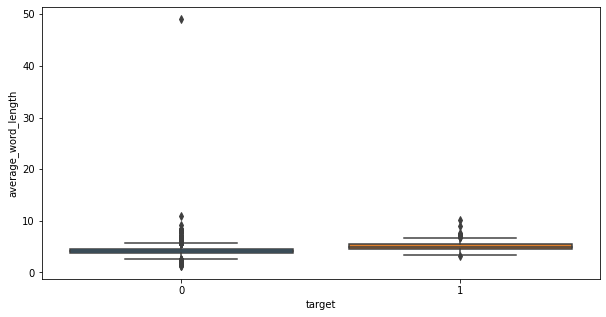

In [ ]:
# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='target',y='average_word_length', data=data)
plt.show()

Observation : 

* This feature looks little cumbersome because box plots distribution of both the class are overlapping so it could not be a good feature in determining a class label.

* Both histogram and box plot looks totally overlapped.

Text(0.5, 1.0, 'Spam messsages word cloud')

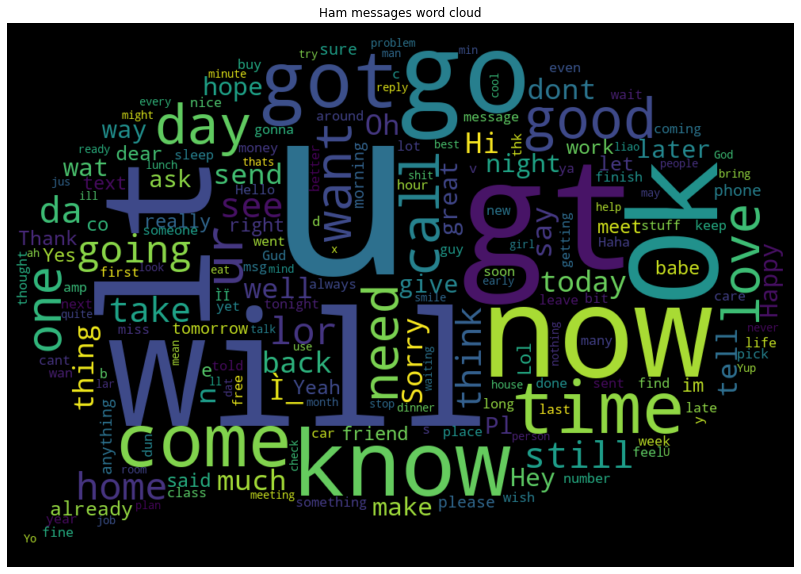

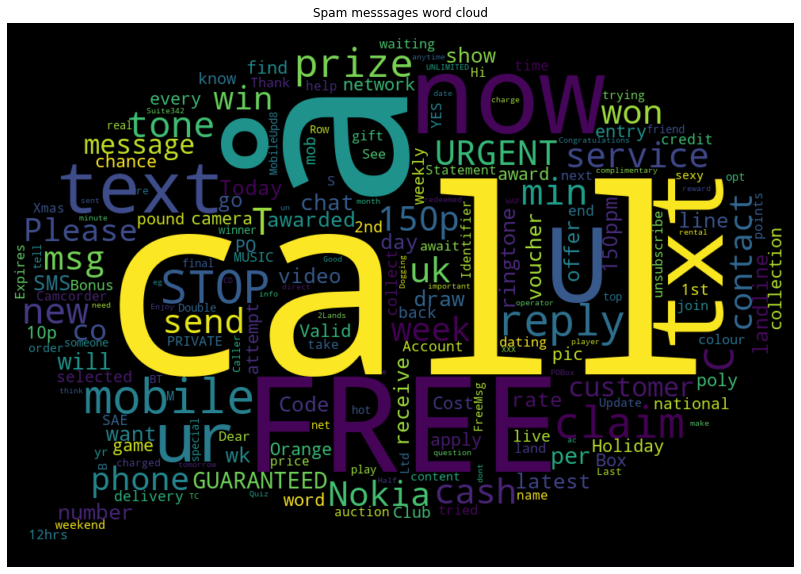

In [ ]:
# Generating a word cloud image before data preprocessing

from PIL import Image

# Ham messages word cloud
mask = np.array(Image.open("/content/wc image.jpg"))
ham_words = ' '.join(list(data[data['target'] == 0]['text']))
ham_wordcloud = WordCloud(background_color="black",width=520,height=520,collocations = False,mask = mask).generate(ham_words)
plt.figure(figsize=(17,10))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ham messages word cloud")

# spam messages word cloud
mask = np.array(Image.open("/content/wc image.jpg"))
spam_words = ' '.join(list(data[data['target'] == 1]['text']))
spam_wordcloud = WordCloud(background_color="black",width=520,height=520,collocations = False,mask = mask).generate(spam_words)
plt.figure(figsize=(17,10))
plt.imshow(spam_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Spam messsages word cloud")

#Reference : https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/

Observations :               
* We have plotted the word cloud before any data preprocesing steps.

* In spam message words like "call" "free" "text" "claim" "now" appeares most frequently.

* In ham messags words like "gt" , "ut" , "will" , "now" , "come" , "ok" appears most frequntly.

Extracted features
1. Length
2. Word Length
3. Sentence Length
4. Digits count
5. Upper case word counts
6. count unique words
7. Average of word length

**Bi- variate Analysis**


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


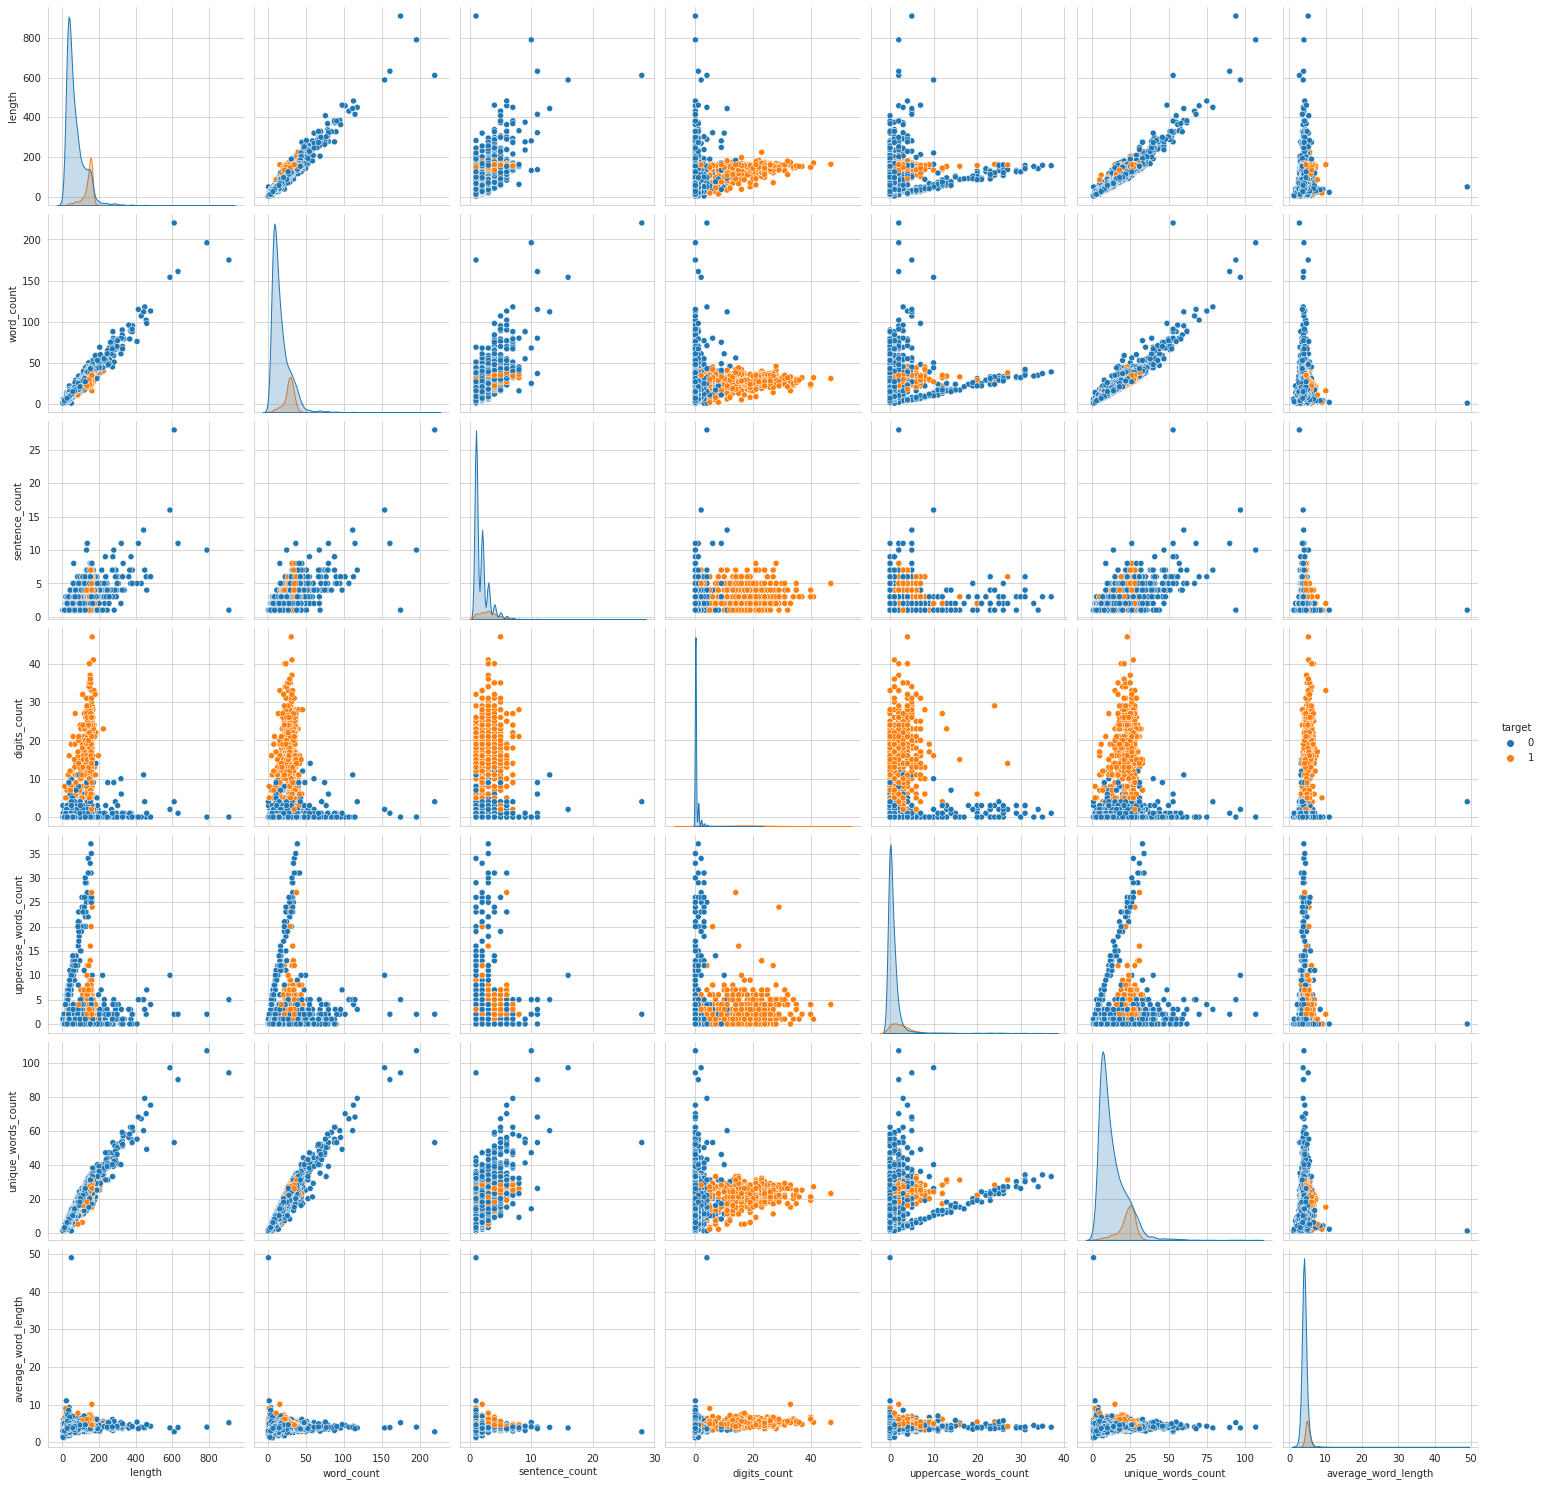

In [ ]:
#pair plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="target", size=3);
plt.show()
# Reference : https://seaborn.pydata.org/generated/seaborn.pairplot.html

Observations :         

* Most of the plots are overlapping with each other.

* Digits count feature is good in seprating positive class and negative class when plotted with every other feature

* From plot 18 (sentence count vs digit count)

    * Most of the sms has sentence length less than 10. There are few ham messages that has sentence length greater than 10.

    * Most of the ham messages has sentence count and digits count less than 10.
    * All the spam messaeges has sentence count less than 10 and most of the spam messages has digits count greater than 8.

* From word count vs digit count plot some of the points are overlapping but most of the spam messages has word count less than 50 and they have digits count greater than 8.

* From length vs digit count we observed that most of the spam messages has length less than 200 and thier digits count greater than 8.

* Rest of the plots looked overlapped.

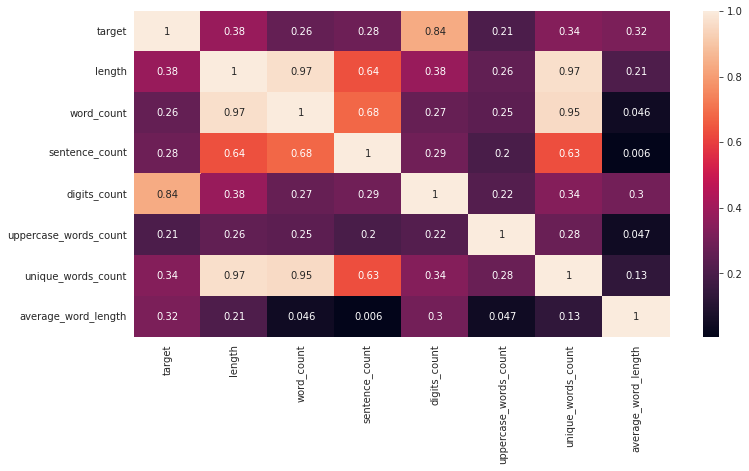

In [ ]:
# Correlation matrix of features
plt.figure(figsize=(12,6))
sns.heatmap(data=data.corr(),annot= True)
plt.show()

Observation : 

*  Here we can see that digits_count feature has highest correlation of 0.84 with target variable, so digit count is the most important feature among all the features in predicting class label. We can say that spam messages contains more digits than ham messages.

* The next most important feature is length feature that has correlation of 0.38 with target variable.

* Rest of the features like unique_word_count , average_word_length , sentence_count , word count etc has decent correlation with target variable but we cannot use these features while buliding our model becuase they are correlated with other like  word_count has correlation of 0.97 with length feature so it will leads to multicollinearity so we will not use these features.

* We will use only digits count and length feature while building our model

**Data Preprocessing**

1.Lowercasing

2.Expanding contractions

3.Remove text in square brackets, links, punctuation and  Special Character

4.Remove stop words

5.Remove digits

6.Remove everything except alphabet

7.Remove Extra Spaces

8.Stemming

In [ ]:
# Expanding contractions (Decontractions)
# Contraction is the shortened form of a word like don’t stands for do not, aren’t stands for are not.
def decontracted(text):
    '''
    Function to expand the contractions
    '''
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
# Reference : Donor Choose Preprocessing Noteook  , # https://stackoverflow.com/a/47091490/4084039

In [ ]:
# remove text from square brackets
text = "What a friend we have in jesus [all our sins] and grief to bear"
text = re.sub('\[.*?\]', '', text)
text
# Reference : https://stackoverflow.com/questions/2359921/how-to-remove-square-brackets-and-anything-between-them-with-a-regex

'What a friend we have in jesus  and grief to bear'

In [ ]:
# remove links
text = " Hello Please refer this link www.google.com"
text = re.sub('https?://\S+|www\.\S+', '', text)
text
# Reference : https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python

' Hello Please refer this link '

In [ ]:
 # Remove punctuation and special character
 def remove_punctuation(text):
     '''
     Function to remove special character and punctuation from text
     '''
     text = nltk.word_tokenize(text)
     lst = []
     for i in text:
        if i not in string.punctuation:
            lst.append(i)
     text = lst[:]
     return ' '.join(lst)

# alternate : sample=''.join([char for char in text if char not in string.punctuation])
# Reference : https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

In [ ]:
# Remove Stopwords
def remove_stopwords(text):
  '''
  Function to rmove stopwords from a given text
  '''
  lst = []
  for char in text.split():
    if char not in stopwords.words('english'):
      lst.append(char)
  return ' '.join(lst)

remove_stopwords("Hello this is the text to remove stopwords")
#alternate : text = ' '.join([char for char in text.split() if char not in stopwords.words('english')])
# Reference : https://stackabuse.com/removing-stop-words-from-strings-in-python/

'Hello text remove stopwords'

In [ ]:
# remove digits
def remove_digits(text):
  '''
  Fuction to remove digits from a given text
  '''
  lst = []
  for char in text:
    if not char.isdigit():
      lst.append(char)
  return ''.join(lst)

remove_digits("Hel1lo 123 12hii34 how6575858are 55 3y2b3o2u")
#Reference : https://stackoverflow.com/questions/12851791/removing-numbers-from-string

'Hello  hii howare  ybou'

In [ ]:
# Remove extra spaces from the text
text = " Hello!!!   What are you  doing    I am fine thank you"
re.sub(' +', ' ', text)
#Reference : https://stackoverflow.com/questions/1546226/is-there-a-simple-way-to-remove-multiple-spaces-in-a-string

' Hello!!! What are you doing I am fine thank you'

In [ ]:
# remove everything except alphabets
def keep_alphabets(text):
  ''' 
  Function to remove everything except alphabet
  '''
  for i in text.split():
    for char in str(i):
      text = re.sub(r'[^a-zA-Z ]+', '', text)
  return text

keep_alphabets("Hello xyz123 I am student @t applied ai course. w#at are you doing")
#Reference : https://stackoverflow.com/questions/21564625/removing-everything-except-letters-and-spaces-from-string-in-python3-3

'Hello xyz I am student t applied ai course wat are you doing'

In [ ]:
# Stemming
# Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')
text = "lovely loving wanted publicly hearing dancing danced "
text = ' '.join(ps.stem(word) for word in text.split(' '))
text

# Reference : https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained

'love love want publicli hear danc danc '

In [ ]:
def data_preprocessing(text):

  '''
  Function to prepreocess and clean the data
  '''

  # lowercasing the text
  text = text.lower()

  # Expanding Contractions(Decontractions)
  text = decontracted(text)
  
  # remove text in square brackets
  text = re.sub('\[.*?\]', '', text)

  # remove links
  text = re.sub('https?://\S+|www\.\S+', '', text)

  # remove punctuation and special characters
  text = remove_punctuation(text)

  # remove stopwords
  text = remove_stopwords(text)

  # remove digits
  text = remove_digits(text)

  # remove everything except alphabet
  text = re.sub(r'[^a-zA-Z ]+', '', text)
  
  # remove extra spaces from the text
  text =  re.sub(' +', ' ', text)

  # Stemming
  text = ' '.join(ps.stem(word) for word in text.split(' '))

  return text

In [ ]:
# test wether every preprocessing step is working correctly or not
data_preprocessing("Hello I am Student @t applied ai course. D@ta science is the hottest job of 21st century. Contact : www.google.com phone number : 5467472XXXXX")

'hello student appli ai cours ta scienc hottest job st centuri contact phone number xxxxx'

In [ ]:
# creating a new column preprocessed text
data['preprocessed_text'] = data['text'].apply(data_preprocessing)
data.head()

,target,text,length,word_count,sentence_count,digits_count,uppercase_words_count,unique_words_count,average_word_length,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,0,20,4.625000,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0,6,3.625000,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,25,2,24,4.189189,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,0,2,10,3.769231,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,1,12,4.066667,nah think goe usf live around though


In [ ]:
# Message before and after preprocessing
print("Message before preprocessing")
print(data['text'][280])   
print("*"*130)
print("Message after preprocessing")
print(data['preprocessed_text'][280])

Message before preprocessing
You got called a tool?
**********************************************************************************************************************************
Message after preprocessing
got call tool


**Exploratory Data Analysis after Data preprocessing.**

In [ ]:
# creating a new pandas dataframe
preprocessed_data = pd.DataFrame()

In [ ]:
preprocessed_data['preprocessed_text'] = data['preprocessed_text']

Adding feature after data preprocessing: Length

In [ ]:
preprocessed_data['length'] = data['preprocessed_text'].apply(len)

Adding feature after data preprocessing: number of words

In [ ]:
preprocessed_data['word_count'] = data['preprocessed_text'].apply((lambda x:len(nltk.word_tokenize(x))))

Adding feature after data preprocessing : number of sentence

In [ ]:
preprocessed_data['sentence_count'] = data['preprocessed_text'].apply((lambda x:len(nltk.sent_tokenize(x))))

Adding feature after data preprocessing: digits count

In [ ]:
#preprocessed_data['digits_count'] = data['preprocessed_text'].map(digits_count)

Adding Feature after data preprocessing: unique words count

In [ ]:
preprocessed_data['unique_words_count'] = data['preprocessed_text'].apply(count_unique_words)

Adding Feature after data preprocessing: average words length

In [ ]:
preprocessed_data['average_word_length'] =  preprocessed_data['length']/preprocessed_data['word_count']

Adding target feature to a Dataframe

In [ ]:
preprocessed_data['target'] = data['target']

Note : Here after preprocessing we are not adding 'digits count' and 'upper case word count feature' becuase while preprocessing we have perfromed lowercasing and digit removal.

In [ ]:
# New data frame after preprocessing
preprocessed_data.head()

,preprocessed_text,length,word_count,sentence_count,unique_words_count,average_word_length,target
0,go jurong point crazi avail bugi n great world...,77,16,1,16,4.812500,0
1,ok lar joke wif u oni,22,6,1,6,3.666667,0
2,free entri wkli comp win fa cup final tkt st m...,104,22,1,20,4.727273,1
3,u dun say earli hor u c alreadi say,36,9,1,7,4.000000,0
4,nah think goe usf live around though,36,7,1,7,5.142857,0


In [ ]:
# converting to csv file after preprocessing
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
# data before preprocessing
data.head()
before_preprocessing = data.iloc[:,:-1]
before_preprocessing.head()
before_preprocessing.to_csv('before_preprocessing.csv', index=False)

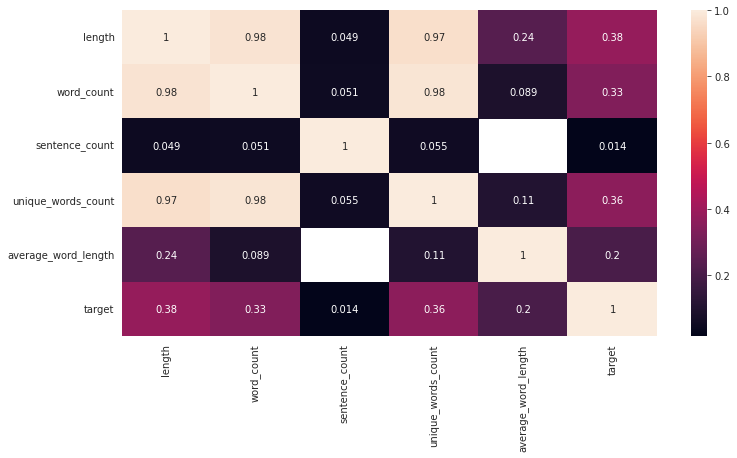

In [ ]:
# Correlation matrix of features after data preprocessing
plt.figure(figsize=(12,6))
sns.heatmap(data=preprocessed_data.corr(),annot= True)
plt.show()

Observations : 
* There is no as such big difference in correlation matrix before and after preprocessing of data.

* After Data preprocessing we found length column as a useful feature becuase we have removed the digits while data preprocessing.

* unique words count is also a useful feature but it is higly correlated with lwngtrh feature.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


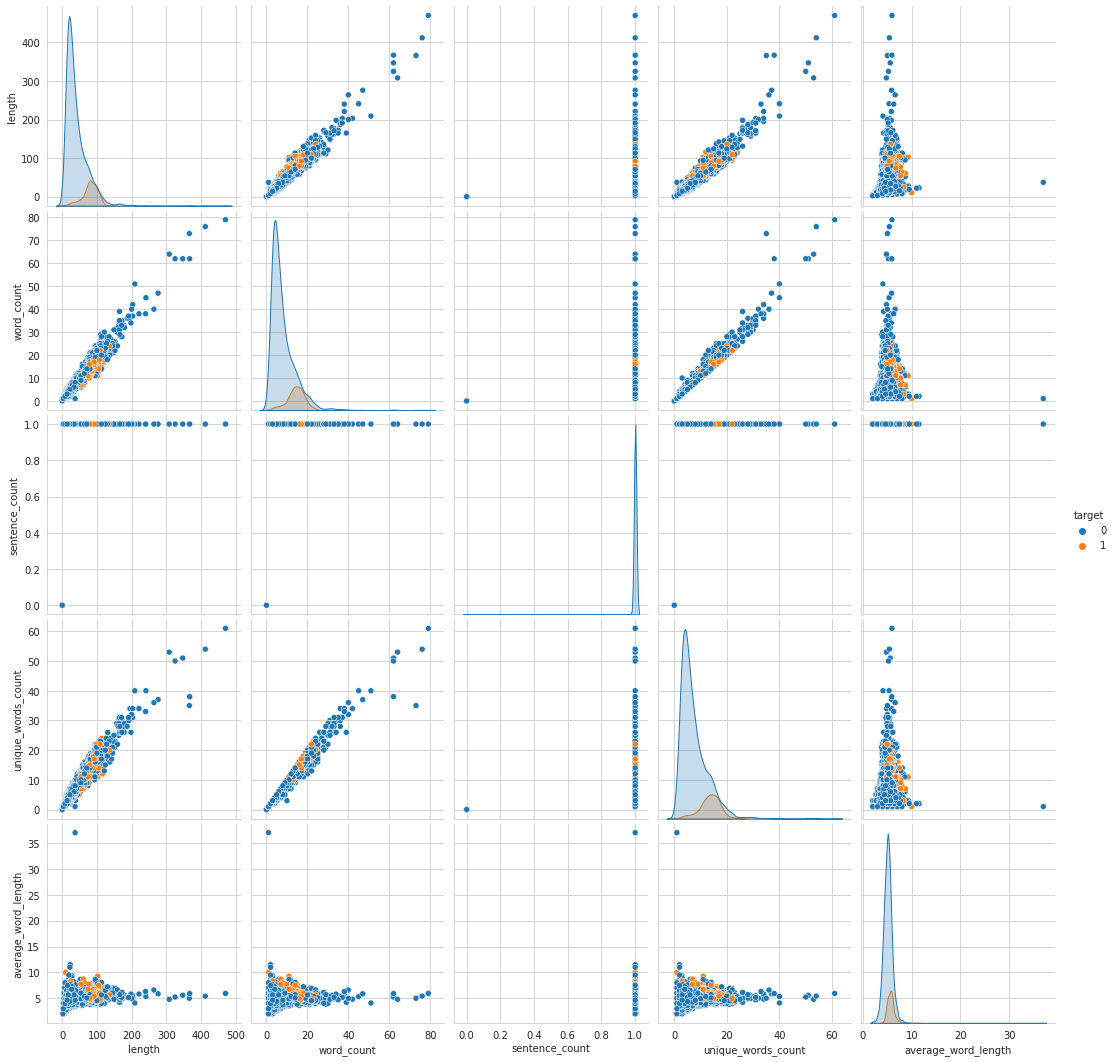

In [ ]:
#pair plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(preprocessed_data, hue="target", size=3);
plt.show()
# Reference : https://seaborn.pydata.org/generated/seaborn.pairplot.html

Observations : 
* For length feature vs other features the datapoints for spam and ham looks a bit seprable but most of them are overlapping.

* For rest of the plots its quite overlapping

* It seems that there is a negligible difference in the features before and after preprrocessing.

Text(0.5, 1.0, 'Spam messsages word cloud')

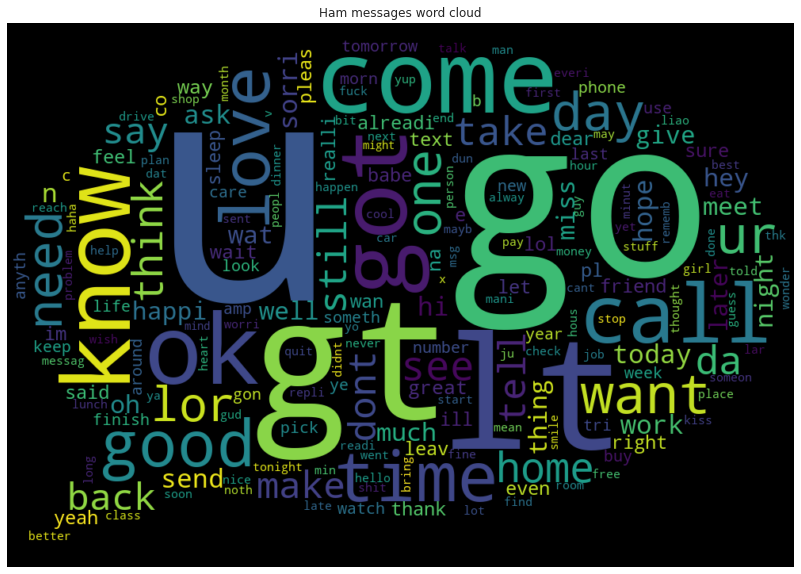

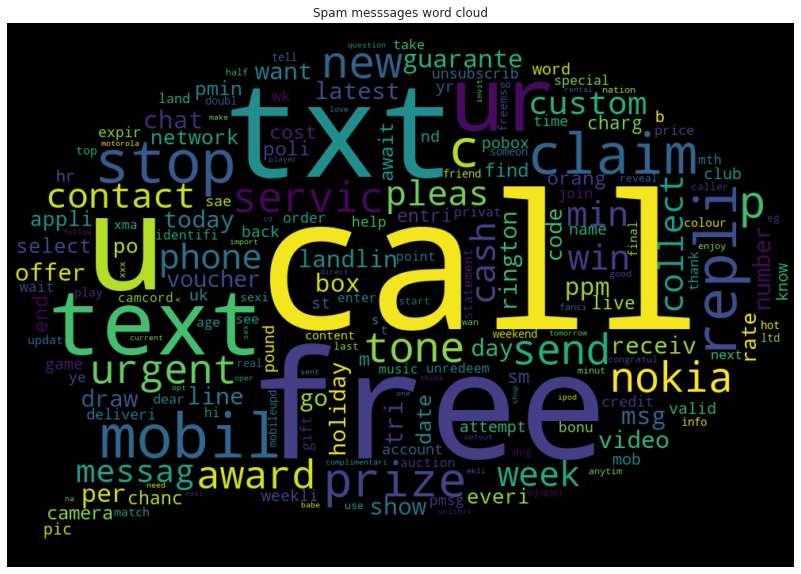

In [ ]:
# Generating a word cloud image after data preprocessing

from PIL import Image

# Ham messages word cloud
mask = np.array(Image.open("/content/wc image.jpg"))
ham_words = ' '.join(list(data[data['target'] == 0]['preprocessed_text']))
ham_wordcloud = WordCloud(background_color="black",width=520,height=520,collocations = False,mask = mask).generate(ham_words)
plt.figure(figsize=(17,10))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ham messages word cloud")

# spam messages word cloud
mask = np.array(Image.open("/content/wc image.jpg"))
ham_words = ' '.join(list(data[data['target'] == 1]['preprocessed_text']))
ham_wordcloud = WordCloud(background_color="black",width=520,height=520,collocations = False,mask = mask).generate(ham_words)
plt.figure(figsize=(17,10))
plt.imshow(ham_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Spam messsages word cloud")

#Reference : https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/

Observations :         

* This is the word cloud for both ham and spam messages after preprocesing

* Most frequent occuring words in spam messages are call , free , txt , urgent, claim , prize , award etc. Typically we observe this kinds of words in spam content.

* Most frequent occuring words in ham messages are u , got , got , go ,gt ,good etc.

In [ ]:
# Get all the words from the messages
def get_words(text):
    '''
    Function to get all the words and storing them into a list
    '''
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_words(data['preprocessed_text'])

# counting most common occuring words
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
print("Most common words")
print("*"* 30)
print(most_common)
# Reference : https://www.kaggle.com/code/madz2000/simple-eda-with-data-cleaning-glove-98-accuracy

Most common words
******************************
{'u': 1058, 'call': 558, 'go': 440, 'get': 428, 'ur': 317, 'gt': 288, 'lt': 287, 'come': 280, 'ok': 256, 'know': 255}


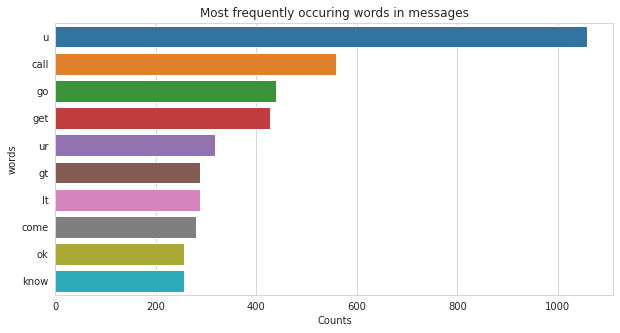

In [ ]:
# Barplot of 10 most frequently occuring words with count
plt.figure(figsize=(10,5))
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))
plt.xlabel("Counts")
plt.ylabel("words")
plt.title("Most frequently occuring words in messages")
plt.show()
# Reference : https://www.kaggle.com/code/madz2000/simple-eda-with-data-cleaning-glove-98-accuracy

Observation :        

* The word "u" occurmore than 1000 times in the our messages.

* "Call" occur 558 times in the messages.

* Words like "go" , "get", "ur" , "gt" etc occurs less than 500 times in the messages 

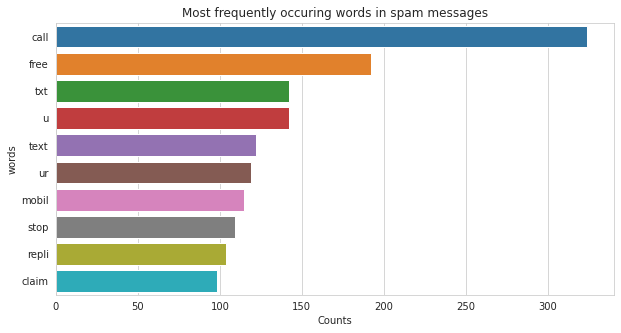

In [ ]:
# most frequently occuring words in a spam messages
spam_corpus = []
for msg in data[data['target'] == 1]['preprocessed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


# frequently occuring word in a spam messages
from collections import Counter
counter = Counter(spam_corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

plt.figure(figsize=(10,5))
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))
plt.xlabel("Counts")
plt.ylabel("words")
plt.title("Most frequently occuring words in spam messages")
plt.show()

Observations :    

* The word "call" occur most number of in spam messages and rest of the words occur less than 200 times in the spam messages.

* We have seen these kinds of words mostly contains in spam content.

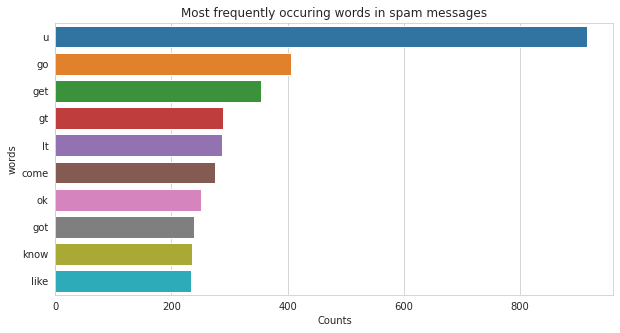

In [ ]:
# most frequently occuring words in a ham messages
spam_corpus = []
for msg in data[data['target'] == 0]['preprocessed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# frequently occuring word in a ham messages
from collections import Counter
counter = Counter(spam_corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

plt.figure(figsize=(10,5))
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))
plt.xlabel("Counts")
plt.ylabel("words")
plt.title("Most frequently occuring words in Ham messages")
plt.show()

Observations :      

* Words like "u" , "go" , "get" , "gt" etc occurs frequently in the ham messages.

In [ ]:
# converting the final Dataset into csv file
data.to_csv('final_data.csv', index=False)

Observations and Conclusion from EDA:

* The messages that has more length, more sentence count, word count and digits has the higher prrobability of being a spam.

* The message length and digit count is good feature in seprating class label.